# Import dependencies

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

# Preprocessing

In [81]:
# Load data
# source: https://www.kaggle.com/datasets/vetrirah/customer
df = pd.read_csv('data/customer_segmentation_train.csv')
df = df.set_index('ID')
df = df.drop('Segmentation',axis=1) # no need for the task at hand
df = df.drop('Var_1',axis=1) # no need for the task at hand
df= pd.get_dummies(df,dummy_na=True,columns=['Gender','Ever_Married','Graduated','Profession','Spending_Score'],drop_first=True, dtype=int)

In [82]:
imputer = KNNImputer()
columns = df.columns
index = df.index
df= pd.DataFrame(imputer.fit_transform(df))
df.columns = columns
df.index=index

In [83]:
df_clustering = df

# Kmeans

## Find optimal K

In [84]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k,random_state=2)
    kmeans.fit(df_clustering)
    distortions.append(kmeans.inertia_)

c:\Users\robbe\Python Projects\1. Personal Projects\Customer Segmentation\customer-segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\robbe\Python Projects\1. Personal Projects\Customer Segmentation\customer-segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\robbe\Python Projects\1. Personal Projects\Customer Segmentation\customer-segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\robbe\Python Projects\1. Personal Projects\Customer Segmentation\custo

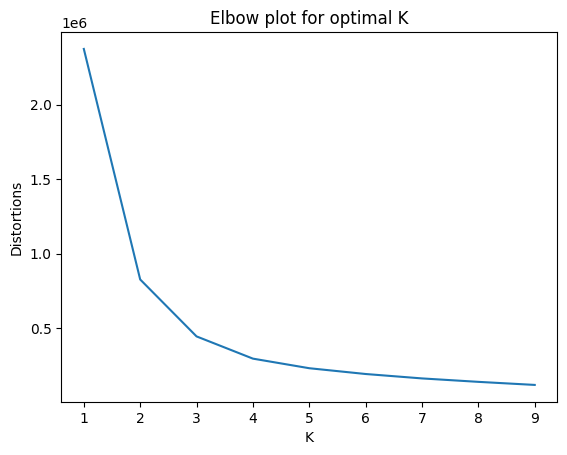

In [85]:
sns.lineplot(data = pd.DataFrame({'K':K,'Distortions':distortions}), x='K',y='Distortions')
plt.title('Elbow plot for optimal K')
plt.show()

# K=3 seems to be the optimal number of clusters

In [86]:
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_clustering)
df['Cluster_Kmeans'] = kmeans.labels_

c:\Users\robbe\Python Projects\1. Personal Projects\Customer Segmentation\customer-segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Cluster visualization

In [87]:
pca = PCA(2)
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca.columns = ['PC1','PC2']
df_pca['Cluster'] = kmeans.labels_

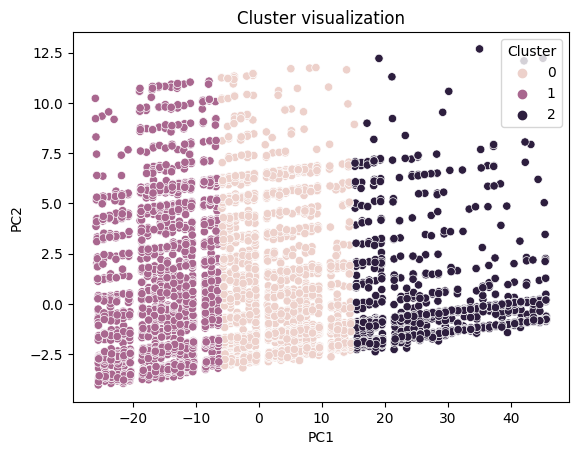

In [88]:
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='Cluster')
plt.title('Cluster visualization')
plt.show()


## Cluster Interpretation

This cluster information can be used to target these customers more specifically with ads.  A classifier could be used to predict the cluster of a new customer and then target him/her with the right ad.

In [89]:
cluster_0 = df[df.Cluster_Kmeans== 0]
cluster_1 = df[df.Cluster_Kmeans == 1]
cluster_2 = df[df.Cluster_Kmeans == 2]

In [90]:
print('Cluster 0')
for var in df.columns:
    print('- '+var +': '+ str(np.round(cluster_0[var].mean(),2)))

# Mid age people, mostly engineers, entertainment and executives, low spenders

Cluster 0
- Age: 46.35
- Work_Experience: 2.67
- Family_Size: 2.7
- Gender_Male: 0.54
- Gender_nan: 0.0
- Ever_Married_Yes: 0.74
- Ever_Married_nan: 0.02
- Graduated_Yes: 0.77
- Graduated_nan: 0.01
- Profession_Doctor: 0.08
- Profession_Engineer: 0.11
- Profession_Entertainment: 0.13
- Profession_Executive: 0.1
- Profession_Healthcare: 0.03
- Profession_Homemaker: 0.03
- Profession_Lawyer: 0.01
- Profession_Marketing: 0.03
- Profession_nan: 0.01
- Spending_Score_High: 0.14
- Spending_Score_Low: 0.48
- Spending_Score_nan: 0.0
- Cluster_Kmeans: 0.0


In [91]:
print('Cluster 1')
for var in df.columns:
    print('- '+var +': '+ str(np.round(cluster_1[var].mean(),2)))

# Young people, mostly doctors and healthcare, low spenders


Cluster 1
- Age: 28.49
- Work_Experience: 3.2
- Family_Size: 3.25
- Gender_Male: 0.54
- Gender_nan: 0.0
- Ever_Married_Yes: 0.27
- Ever_Married_nan: 0.02
- Graduated_Yes: 0.45
- Graduated_nan: 0.01
- Profession_Doctor: 0.12
- Profession_Engineer: 0.08
- Profession_Entertainment: 0.11
- Profession_Executive: 0.03
- Profession_Healthcare: 0.36
- Profession_Homemaker: 0.04
- Profession_Lawyer: 0.0
- Profession_Marketing: 0.05
- Profession_nan: 0.02
- Spending_Score_High: 0.05
- Spending_Score_Low: 0.82
- Spending_Score_nan: 0.0
- Cluster_Kmeans: 1.0


In [92]:
print('Cluster 2')
for var in df.columns:
    print('- '+var +': '+ str(np.round(cluster_2[var].mean(),2)))

# Old people, mostly lawyers, high spenders

Cluster 2
- Age: 70.72
- Work_Experience: 1.35
- Family_Size: 2.24
- Gender_Male: 0.6
- Gender_nan: 0.0
- Ever_Married_Yes: 0.92
- Ever_Married_nan: 0.02
- Graduated_Yes: 0.66
- Graduated_nan: 0.01
- Profession_Doctor: 0.03
- Profession_Engineer: 0.05
- Profession_Entertainment: 0.1
- Profession_Executive: 0.12
- Profession_Healthcare: 0.01
- Profession_Homemaker: 0.01
- Profession_Lawyer: 0.38
- Profession_Marketing: 0.02
- Profession_nan: 0.02
- Spending_Score_High: 0.39
- Spending_Score_Low: 0.39
- Spending_Score_nan: 0.0
- Cluster_Kmeans: 2.0


# Birch

Birch is amore efficient clustering algorithm than KMeans. In this example the difference in speed will be neglegible but when dealing with larger datasets, this could be advantageous

In [93]:
birch = Birch(branching_factor=10)
birch.fit(df_clustering)
df['Cluster_Birch'] = birch.predict(df_clustering)


## Cluster Interpretation

Birch finds the same clusters as KMeans in terms of their interpretation

In [94]:
cluster_0 = df[df.Cluster_Birch== 0]
cluster_1 = df[df.Cluster_Birch == 1]
cluster_2 = df[df.Cluster_Birch == 2]

In [95]:
print('Cluster 0')
for var in df.columns:
    print('- '+var +': '+ str(np.round(cluster_0[var].mean(),2)))

Cluster 0
- Age: 31.87
- Work_Experience: 3.28
- Family_Size: 3.05
- Gender_Male: 0.53
- Gender_nan: 0.0
- Ever_Married_Yes: 0.36
- Ever_Married_nan: 0.02
- Graduated_Yes: 0.54
- Graduated_nan: 0.01
- Profession_Doctor: 0.11
- Profession_Engineer: 0.09
- Profession_Entertainment: 0.12
- Profession_Executive: 0.05
- Profession_Healthcare: 0.27
- Profession_Homemaker: 0.04
- Profession_Lawyer: 0.0
- Profession_Marketing: 0.05
- Profession_nan: 0.02
- Spending_Score_High: 0.07
- Spending_Score_Low: 0.75
- Spending_Score_nan: 0.0
- Cluster_Kmeans: 0.72
- Cluster_Birch: 0.0


In [96]:
print('Cluster 1')
for var in df.columns:
    print('- '+var +': '+ str(np.round(cluster_1[var].mean(),2)))   

Cluster 1
- Age: 52.6
- Work_Experience: 2.02
- Family_Size: 2.8
- Gender_Male: 0.57
- Gender_nan: 0.0
- Ever_Married_Yes: 0.84
- Ever_Married_nan: 0.02
- Graduated_Yes: 0.78
- Graduated_nan: 0.01
- Profession_Doctor: 0.06
- Profession_Engineer: 0.1
- Profession_Entertainment: 0.14
- Profession_Executive: 0.11
- Profession_Healthcare: 0.02
- Profession_Homemaker: 0.02
- Profession_Lawyer: 0.02
- Profession_Marketing: 0.02
- Profession_nan: 0.02
- Spending_Score_High: 0.18
- Spending_Score_Low: 0.39
- Spending_Score_nan: 0.0
- Cluster_Kmeans: 0.39
- Cluster_Birch: 1.0


In [97]:
print('Cluster 2')
for var in df.columns:
    print('- '+var +': '+ str(np.round(cluster_2[var].mean(),2)))

Cluster 2
- Age: 74.8
- Work_Experience: 1.16
- Family_Size: 2.03
- Gender_Male: 0.58
- Gender_nan: 0.0
- Ever_Married_Yes: 0.94
- Ever_Married_nan: 0.01
- Graduated_Yes: 0.62
- Graduated_nan: 0.01
- Profession_Doctor: 0.02
- Profession_Engineer: 0.04
- Profession_Entertainment: 0.06
- Profession_Executive: 0.12
- Profession_Healthcare: 0.0
- Profession_Homemaker: 0.01
- Profession_Lawyer: 0.53
- Profession_Marketing: 0.02
- Profession_nan: 0.01
- Spending_Score_High: 0.46
- Spending_Score_Low: 0.41
- Spending_Score_nan: 0.0
- Cluster_Kmeans: 2.0
- Cluster_Birch: 2.0


# Agglomerative Clustering

In [98]:
#Scikit-learn implementation of plotting dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [99]:
Agglom = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
Agglom.fit(df_clustering)


AgglomerativeClustering(distance_threshold=0, n_clusters=None)

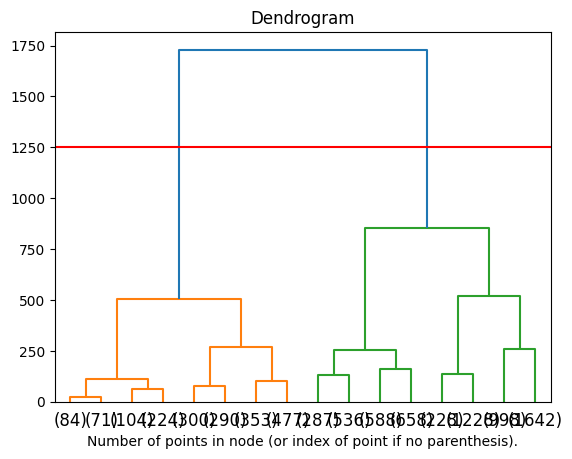

In [100]:
plt.title('Dendrogram')
plot_dendrogram(Agglom, truncate_mode='level', p=3)
plt.axhline(y=1250, color = 'r')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Red line indicates the optimal split -> 2 clusters
# This is different from before, but in the elbow plot of KMeans, we could see that 2 clusters also could be a good solution

In [101]:
Agglom_2clus = AgglomerativeClustering(n_clusters=2)
Agglom_2clus.fit(df_clustering)
df['Cluster_Agglom'] = Agglom_2clus.labels_

## Cluster Interpretation

Now we have a cluster with yougher people, low spenders and mostly healthcare, doctor, engineer and entertainment. Secondly we have a cluster with older people, high spenders and moslty lawyers

In [102]:
cluster_0 = df[df.Cluster_Agglom== 0]
cluster_1 = df[df.Cluster_Agglom == 1]

In [103]:
print('Cluster 0')
for var in df.columns:
    print('- '+var +': '+ str(np.round(cluster_0[var].mean(),2)))

Cluster 0
- Age: 35.93
- Work_Experience: 3.03
- Family_Size: 3.0
- Gender_Male: 0.53
- Gender_nan: 0.0
- Ever_Married_Yes: 0.47
- Ever_Married_nan: 0.02
- Graduated_Yes: 0.6
- Graduated_nan: 0.01
- Profession_Doctor: 0.1
- Profession_Engineer: 0.1
- Profession_Entertainment: 0.12
- Profession_Executive: 0.06
- Profession_Healthcare: 0.21
- Profession_Homemaker: 0.04
- Profession_Lawyer: 0.0
- Profession_Marketing: 0.04
- Profession_nan: 0.01
- Spending_Score_High: 0.09
- Spending_Score_Low: 0.67
- Spending_Score_nan: 0.0
- Cluster_Kmeans: 0.55
- Cluster_Birch: 0.24
- Cluster_Agglom: 0.0


In [104]:
print('Cluster 1')
for var in df.columns:
    print('- '+var +': '+ str(np.round(cluster_1[var].mean(),2)))

Cluster 1
- Age: 67.9
- Work_Experience: 1.38
- Family_Size: 2.33
- Gender_Male: 0.6
- Gender_nan: 0.0
- Ever_Married_Yes: 0.92
- Ever_Married_nan: 0.02
- Graduated_Yes: 0.68
- Graduated_nan: 0.01
- Profession_Doctor: 0.04
- Profession_Engineer: 0.06
- Profession_Entertainment: 0.1
- Profession_Executive: 0.12
- Profession_Healthcare: 0.01
- Profession_Homemaker: 0.01
- Profession_Lawyer: 0.32
- Profession_Marketing: 0.02
- Profession_nan: 0.02
- Spending_Score_High: 0.35
- Spending_Score_Low: 0.38
- Spending_Score_nan: 0.0
- Cluster_Kmeans: 1.6
- Cluster_Birch: 1.57
- Cluster_Agglom: 1.0
